In [6]:
import sys 
import os 

sys.path.append('../..')

DATA_DIR = '../../data'
os.environ['DATA_DIR'] = DATA_DIR

from utils.data import load_gpt, load_cslb, load_mcrae, load_behav
from utils.stats import stats
from matplotlib import pyplot as plt


In [2]:
cslb_df = load_cslb(False)
mc_df = load_mcrae(False, False)

../../data


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


NameError: name 'gpt_df' is not defined

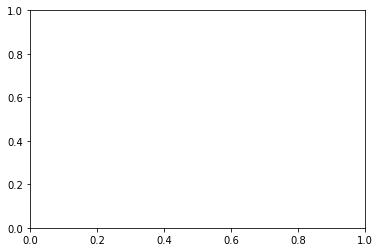

In [3]:
fig, ax = plt.subplots(1)

bla = gpt_df.groupby('feature', as_index=False).agg({'concept_id': 'count'})
bla = bla.sort_values(by='concept_id')
ax.plot(bla['feature'], bla['concept_id'])

# Stats about number of features

In [ ]:

print('Stats for CSLB')
stats(cslb_df)
print('\n')

print('Stats for GPT with duplicates')
stats(gpt_df)
print('\n')

print('Stats for final GPT norm without duplicates')
gpt_df_without_dup = load_gpt(4, False, 1, 1, False)
stats(gpt_df_without_dup)
print('\n')

print('Stats for GPT without duplicates and no filter')
gpt_df_without_dup_no = load_gpt(1, False, 1, 1, False)
stats(gpt_df_without_dup_no)
print('\n')

print('Stats for McRae without duplicates')
stats(mc_df)


In [ ]:
feature_norm = load_gpt(1, False, 1, True, 'mcrae_priming', 'gpt3-davinci', 10)
stats(feature_norm)

Amount of features: 172442
Amount of concepts: 1854
Amount of unique features: 32398
Mean amount of feature per concept: 93.01078748651564
Share of unique features to all features: 18.787766321429814
Mean amount of concepts per feature: 5.322612506944873
Mean amount of shared features per concept: 77.48112189859762


(172442, 1854, 32398, 93.01078748651564, 5.322612506944873, 77.48112189859762)

In [ ]:
feature_norm = load_gpt(1, False, 1, True, 'mcrae_priming', 'gpt4', 10)
stats(feature_norm)

Amount of features: 37200
Amount of concepts: 317
Amount of unique features: 6994
Mean amount of feature per concept: 117.35015772870662
Share of unique features to all features: 18.801075268817204
Mean amount of concepts per feature: 5.318844724049185
Mean amount of shared features per concept: 99.5205047318612


(37200, 317, 6994, 117.35015772870662, 5.318844724049185, 99.5205047318612)

## Plots

In [7]:
def plot(run_filter_column, x_label, feature_norm):
    x = []
    amount_unique_features = []
    fig, axes = plt.subplots(3,2, figsize=(20,20))
    mean_amount_features = []
    mean_amount_concepts_per_feature = []
    mean_amount_shared_features = []
    amount_features = []
    amount_concepts = []
    
    for i in range(1, 30):
        temp = feature_norm[feature_norm[run_filter_column] >= i]
        x.append(i)
        n_features, n_concepts, n_unique_features, mean_amount_features_per_concept, mean_amount_of_concepts_per_feature, mean_amount_shared_features_per_concept = stats(temp)
        amount_features.append(n_features)
        amount_concepts.append(n_concepts)
        amount_unique_features.append(n_unique_features)
        mean_amount_features.append(mean_amount_features_per_concept)
        mean_amount_concepts_per_feature.append(mean_amount_of_concepts_per_feature)
        mean_amount_shared_features.append(mean_amount_shared_features_per_concept)
        
        
    axes[0][0].plot(x, amount_features)
    axes[0][0].set_title('amount of features')
    axes[0][0].set_xlabel(x_label)
    axes[0][0].set_ylabel('amount of features')

    axes[0][1].plot(x, amount_unique_features)
    axes[0][1].set_title('amount of unique features')
    axes[0][1].set_xlabel(x_label)
    axes[0][1].set_ylabel('amount of unique features')

    axes[1][0].plot(x, mean_amount_features)
    axes[1][0].set_title('mean amount of features per concept')
    axes[1][0].set_xlabel(x_label)
    axes[1][0].set_ylabel('mean amount of features')

    axes[1][1].plot(x, amount_concepts)
    axes[1][1].set_title('Amount of concepts')
    axes[1][1].set_xlabel(x_label)
    axes[1][1].set_ylabel('amount of concepts')
    
    axes[2][0].plot(x, mean_amount_concepts_per_feature)
    axes[2][0].set_title('Mean amount of concepts per feature')
    axes[2][0].set_xlabel(x_label)
    axes[2][0].set_ylabel('mean amount of concepts')
    
    axes[2][1].plot(x, mean_amount_shared_features)
    axes[2][1].set_title('Mean amount of shared features per concept')
    axes[2][1].set_xlabel(x_label)
    axes[2][1].set_ylabel('mean amount of shared features')
    
    plt.tight_layout()


Amount of features: 37200
Amount of concepts: 317
Amount of unique features: 6994
Mean amount of feature per concept: 117.35015772870662
Share of unique features to all features: 18.801075268817204
Mean amount of concepts per feature: 5.318844724049185
Mean amount of shared features per concept: 99.5205047318612
Amount of features: 31082
Amount of concepts: 317
Amount of unique features: 3198
Mean amount of feature per concept: 98.05047318611987
Share of unique features to all features: 10.288913197348947
Mean amount of concepts per feature: 9.719199499687305
Mean amount of shared features per concept: 91.71608832807571
Amount of features: 27232
Amount of concepts: 316
Amount of unique features: 2141
Mean amount of feature per concept: 86.17721518987342
Share of unique features to all features: 7.862074030552292
Mean amount of concepts per feature: 12.719290051377861
Mean amount of shared features per concept: 86.17721518987342
Amount of features: 24013
Amount of concepts: 316
Amount o

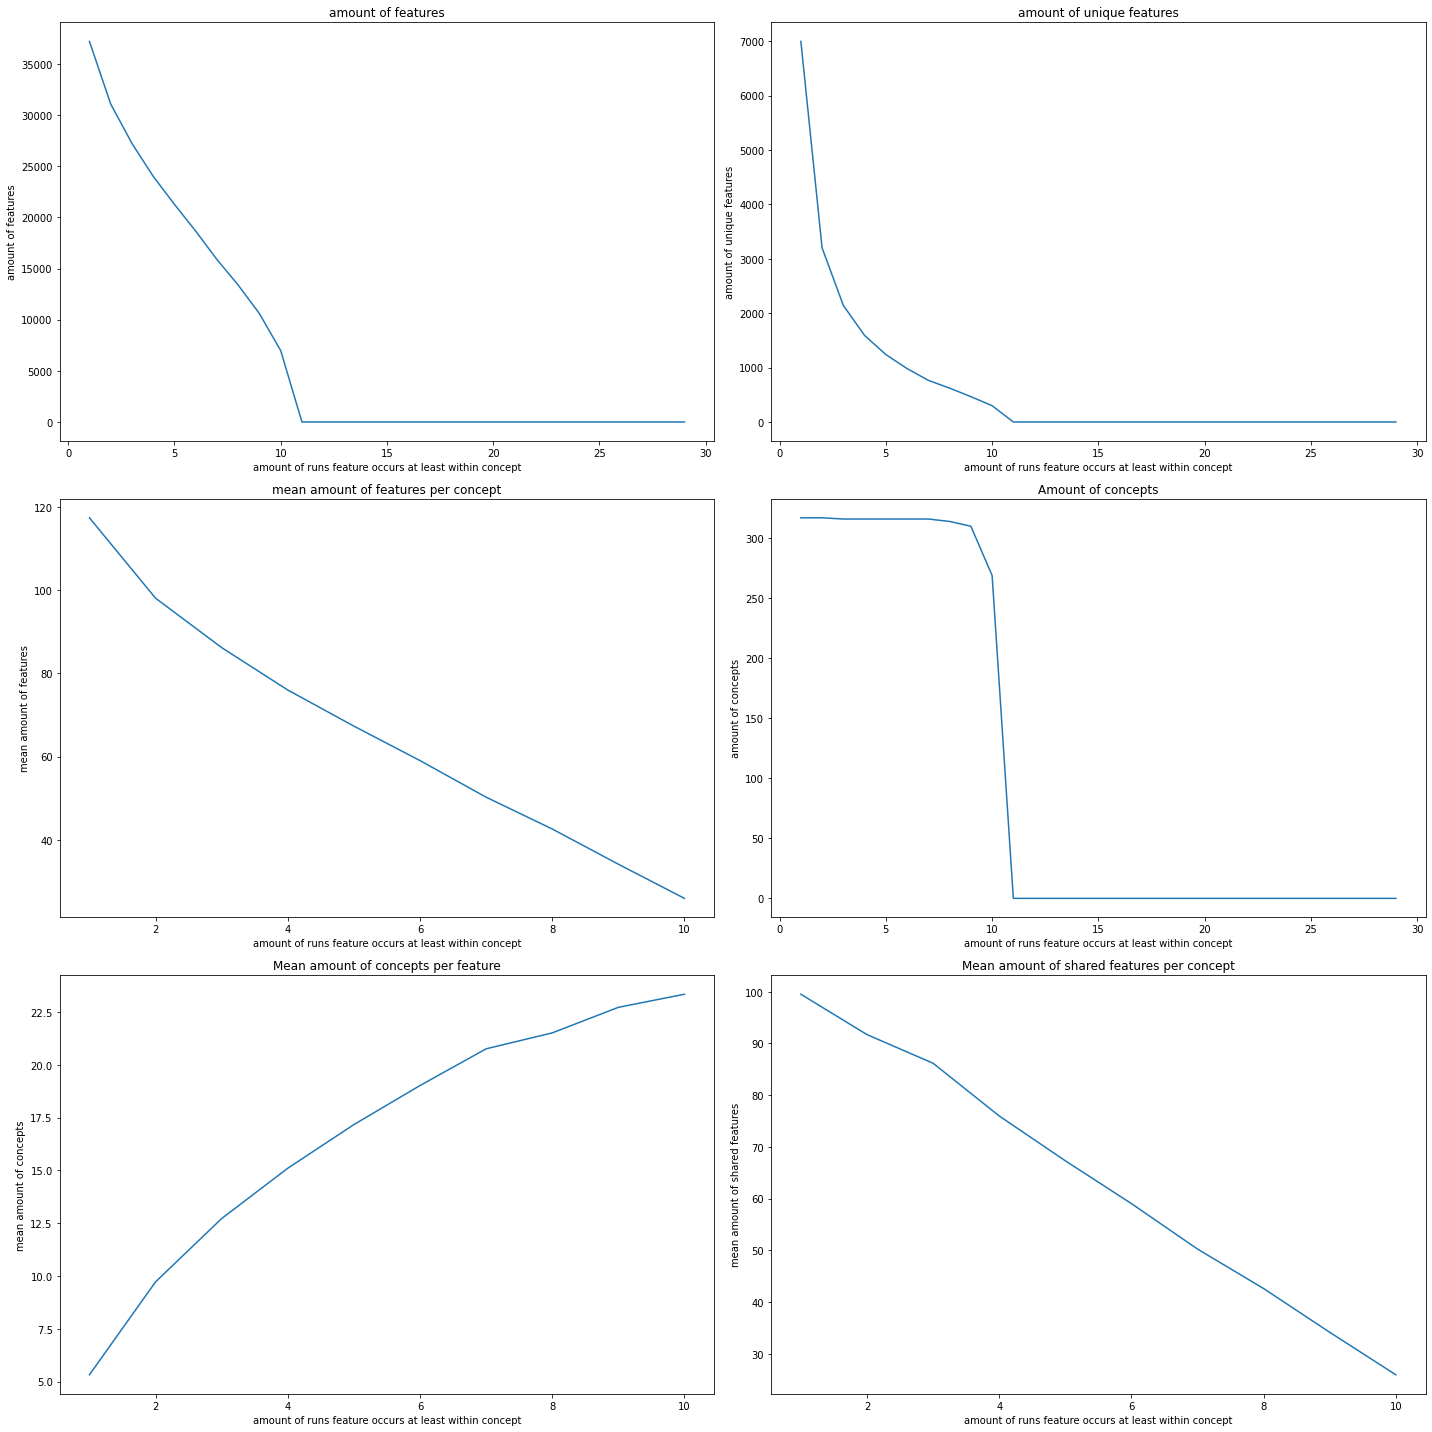

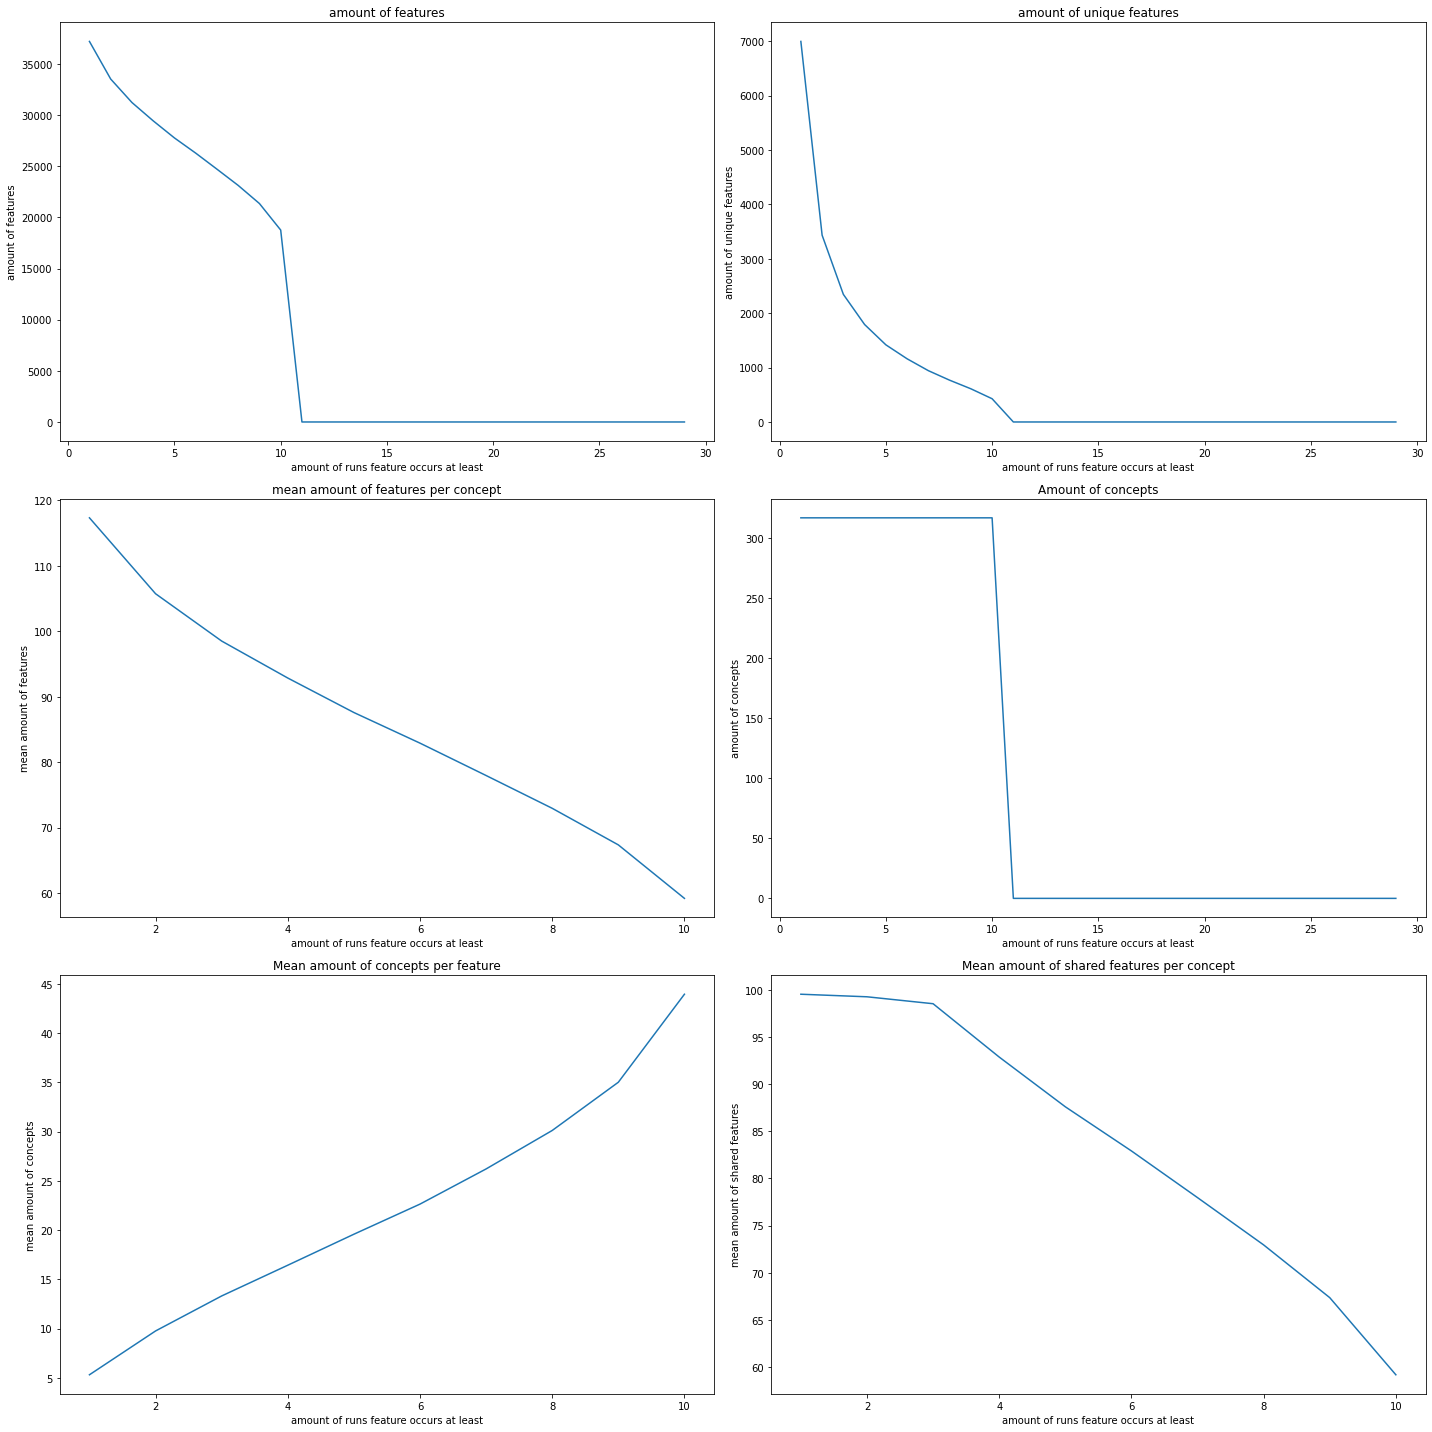

In [8]:
feature_norm = load_gpt(1, False, 1, True, 'mcrae_priming', 'gpt4', 10)
plot('amount_runs_feature_occured_within_concept', 'amount of runs feature occurs at least within concept', feature_norm)
plot('amount_runs_feature_occured', 'amount of runs feature occurs at least', feature_norm)



Amount of features: 172442
Amount of concepts: 1854
Amount of unique features: 32398
Mean amount of feature per concept: 93.01078748651564
Share of unique features to all features: 18.787766321429814
Mean amount of concepts per feature: 5.322612506944873
Mean amount of shared features per concept: 77.48112189859762
Amount of features: 157548
Amount of concepts: 1854
Amount of unique features: 18318
Mean amount of feature per concept: 84.97734627831716
Share of unique features to all features: 11.626932744306497
Mean amount of concepts per feature: 8.600720602685882
Mean amount of shared features per concept: 77.12998921251348
Amount of features: 151383
Amount of concepts: 1854
Amount of unique features: 13738
Mean amount of feature per concept: 81.65210355987055
Share of unique features to all features: 9.07499521082288
Mean amount of concepts per feature: 11.019289561799388
Mean amount of shared features per concept: 76.70334412081985
Amount of features: 147087
Amount of concepts: 185

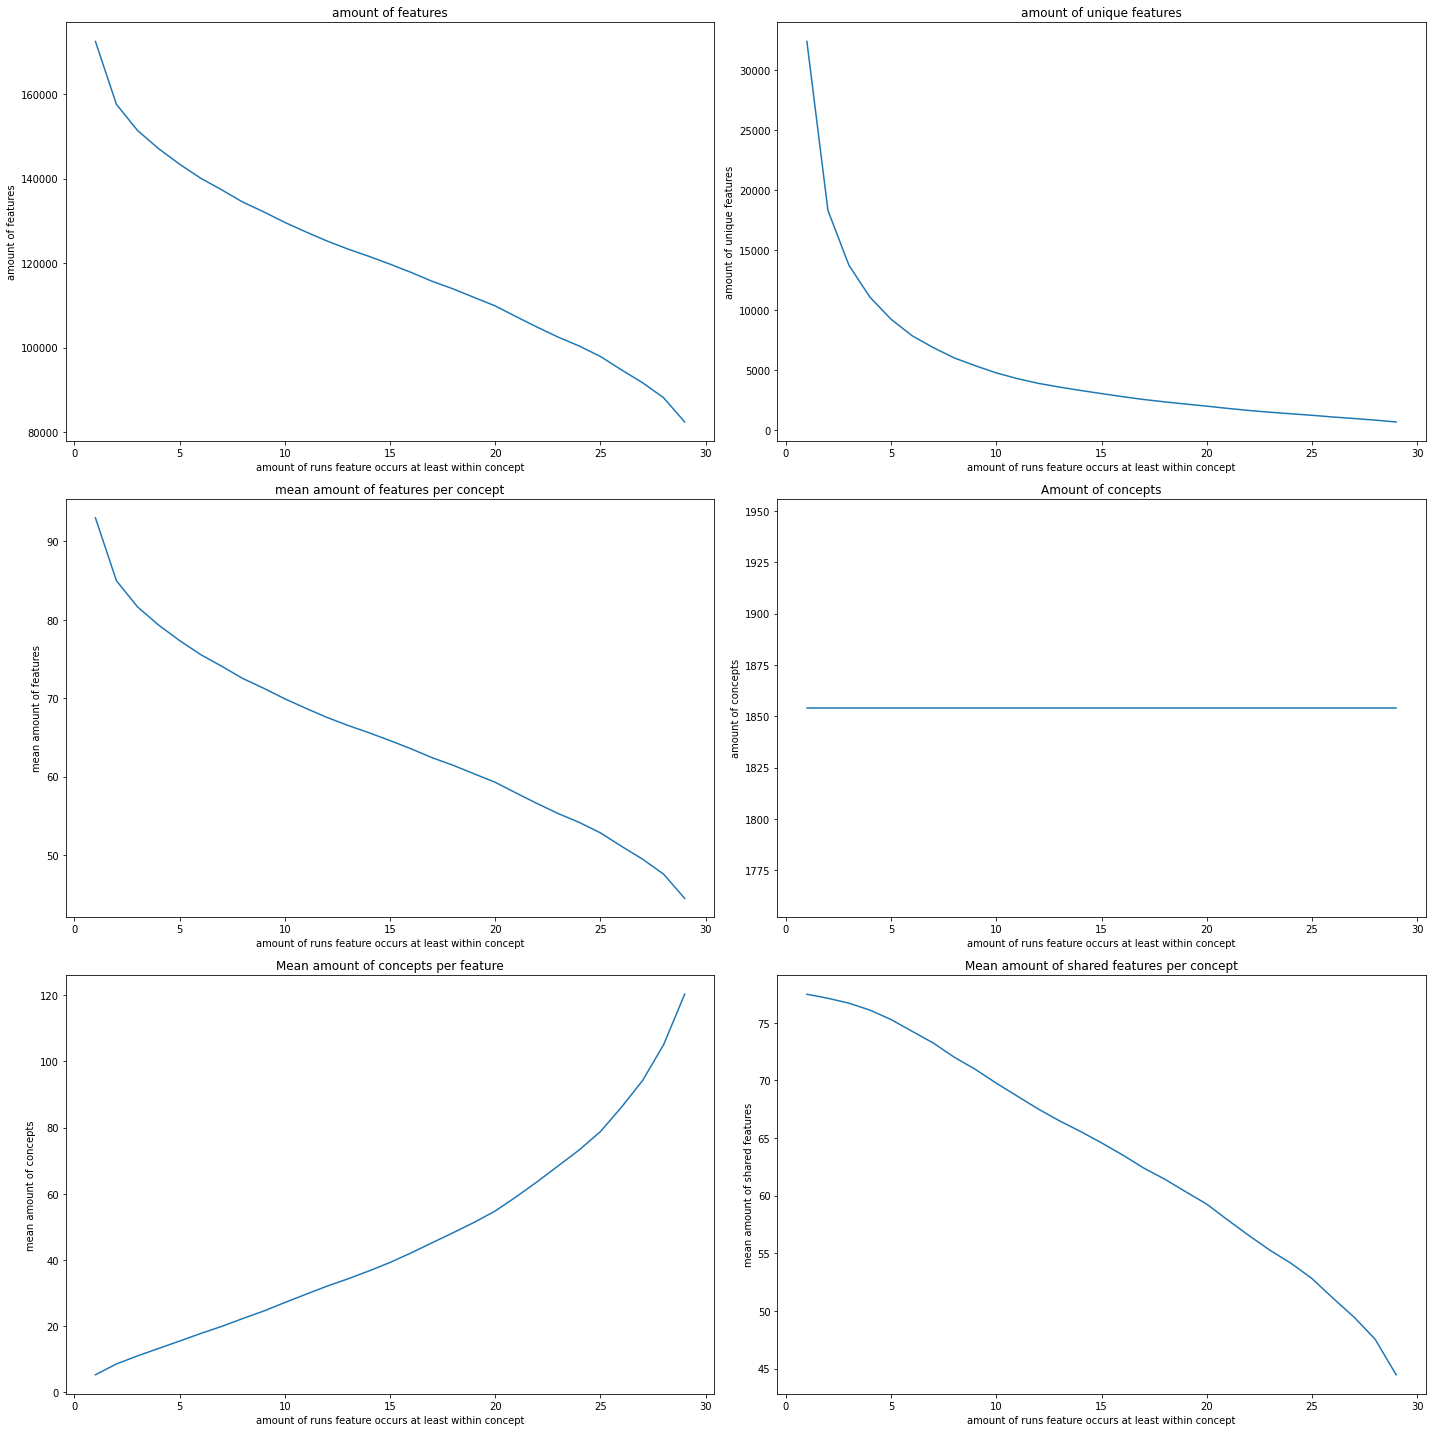

In [10]:
feature_norm = load_gpt(1, False, 1, True, 'mcrae_priming', 'gpt3-davinci', 10)
plot('amount_runs_feature_occured', 'amount of runs feature occurs at least within concept', feature_norm)

